# Настройка окружения

In [1]:
import pandas as pd

# Загрузка данных

In [2]:
url_data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'

Информация с сайта (перевод)

Data Set Information:

Предсказание возраста морского ушка (вид моллюска) по физическим измерениям. Возраст морского ушка определяется путем разрезания раковины через конус, окрашивания ее и подсчета количества колец под микроскопом - скучная и отнимающая много времени задача. Другие измерения, которые легче получить, используются для прогнозирования возраста. Для решения проблемы может потребоваться дополнительная информация, такая как погодные условия и местоположение (следовательно, наличие продуктов питания).

Из исходных данных были удалены примеры с отсутствующими значениями (в большинстве из которых отсутствовало прогнозируемое значение), а диапазоны непрерывных значений были масштабированы для использования с ANN (путем деления на 200).

Атрибутивная информация:

Дано имя атрибута, тип атрибута, единица измерения и краткое описание. Количество колец - это величина, которую нужно предсказать: либо как непрерывное значение, либо как проблему классификации.

Name / Data Type / Measurement Unit / Description

- Sex / nominal / -- / M, F, and I (infant)
- Length / continuous / mm / Longest shell measurement
- Diameter / continuous / mm / perpendicular to length
- Height / continuous / mm / with meat in shell
- Whole weight / continuous / grams / whole abalone
- Shucked weight / continuous / grams / weight of meat
- Viscera weight / continuous / grams / gut weight (after bleeding)
- Shell weight / continuous / grams / after being dried
- Rings / integer / -- / +1.5 gives the age in years


In [3]:
df = pd.read_csv(url_data, header=None,
                 names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'])

# Обзор данных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
df.head(5)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


array([[<AxesSubplot:title={'center':'Diameter'}>]], dtype=object)

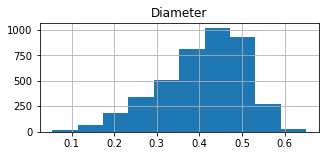

In [6]:
df.hist('Diameter', figsize=[5,2])

array([[<AxesSubplot:title={'center':'Height'}>]], dtype=object)

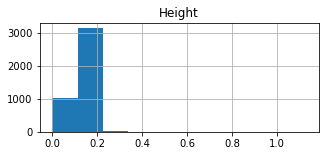

In [7]:
df.hist('Height', figsize=[5,2])

array([[<AxesSubplot:title={'center':'Whole_weight'}>]], dtype=object)

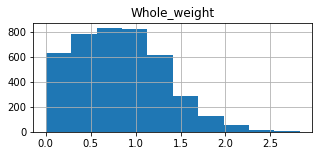

In [8]:
df.hist('Whole_weight', figsize=[5,2])

<AxesSubplot:>

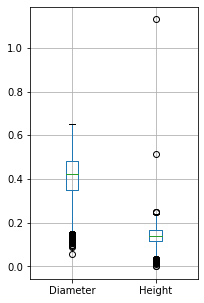

In [9]:
df.boxplot(['Diameter', 'Height'],  figsize=[3,5])

# Удаление выбросов

Видим, что есть выбросы. Найдём их

In [10]:
df_cleared = df.copy()

<AxesSubplot:>

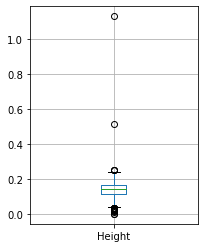

In [11]:
df.boxplot('Height', figsize=[3,4])

In [12]:
# отбрасываем выбросы по высоте
df_cleared = df_cleared[(df_cleared.Height > 0.05) & (df_cleared.Height < 0.25)]

<AxesSubplot:>

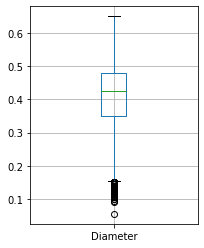

In [13]:
df.boxplot('Diameter', figsize=[3,4])

In [14]:
# отбрасываем выбросы по диаметру
df_cleared = df_cleared[df_cleared.Diameter > 0.15]

Снова построим диаграммы размаха

<AxesSubplot:>

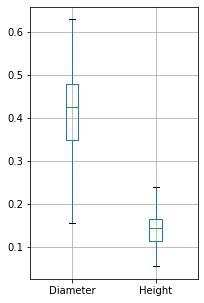

In [15]:
df_cleared.boxplot(['Diameter', 'Height'], figsize=[3,5])

# Поиск возможных зависимостей

Посмотрим все исследованные переменные

array([[<AxesSubplot:xlabel='Diameter', ylabel='Diameter'>,
        <AxesSubplot:xlabel='Height', ylabel='Diameter'>,
        <AxesSubplot:xlabel='Whole_weight', ylabel='Diameter'>],
       [<AxesSubplot:xlabel='Diameter', ylabel='Height'>,
        <AxesSubplot:xlabel='Height', ylabel='Height'>,
        <AxesSubplot:xlabel='Whole_weight', ylabel='Height'>],
       [<AxesSubplot:xlabel='Diameter', ylabel='Whole_weight'>,
        <AxesSubplot:xlabel='Height', ylabel='Whole_weight'>,
        <AxesSubplot:xlabel='Whole_weight', ylabel='Whole_weight'>]],
      dtype=object)

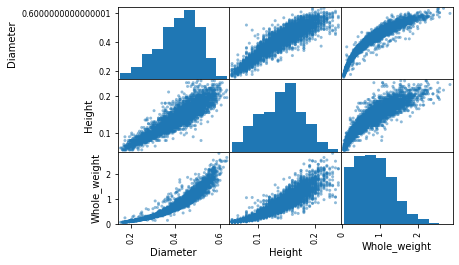

In [16]:
pd.plotting.scatter_matrix(df_cleared[['Diameter', 'Height', 'Whole_weight']])

Посмотрим только вес от диаметра

<AxesSubplot:xlabel='Diameter', ylabel='Whole_weight'>

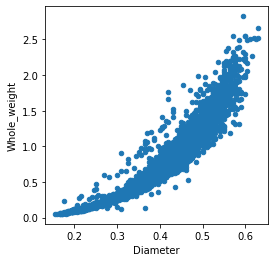

In [17]:
df_cleared.plot(x='Diameter', y='Whole_weight', kind='scatter', figsize=[4,4])

Посмотрим только вес от высоты

<AxesSubplot:xlabel='Height', ylabel='Whole_weight'>

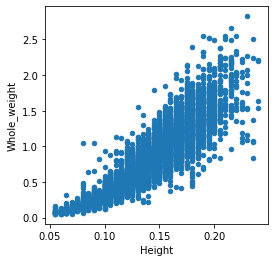

In [18]:
df_cleared.plot(x='Height', y='Whole_weight', kind='scatter', figsize=[4,4])

Хорошо видна зависимость, нужно её исследовать

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression().fit(df_cleared[['Diameter']], df_cleared['Whole_weight'])
model.score(df_cleared[['Diameter']], df_cleared['Whole_weight'])

0.8689911189760934

# Делим массив на части

In [21]:
df_cleared.shape

(4093, 9)

In [22]:
df_first = df_cleared.iloc[:(df_cleared.shape[0] // 2)]
df_first.shape

(2046, 9)

In [23]:
df_second = df_cleared.iloc[(df_cleared.shape[0] // 2):]
df_second.shape

(2047, 9)

# Обучение модели

In [24]:
# обучение модели по первой части
model_1 = LinearRegression().fit(df_first[['Diameter']], df_first['Whole_weight'])
model_2 = LinearRegression().fit(df_first[['Height']], df_first['Whole_weight'])
model_3 = LinearRegression().fit(df_first[['Diameter', 'Height']], df_first['Whole_weight'])

# Предсказание значений

In [25]:
# предсказание по второй части
weight_pred_1 = model_1.predict(df_second[['Diameter']])
weight_pred_2 = model_2.predict(df_second[['Height']])
weight_pred_3 = model_3.predict(df_second[['Diameter', 'Height']])

# Оценка качества модели

In [26]:
import matplotlib.pyplot as plt  # для рисования графиков
import numpy as np  # для рассчёта корреляции

0.9311947239751597


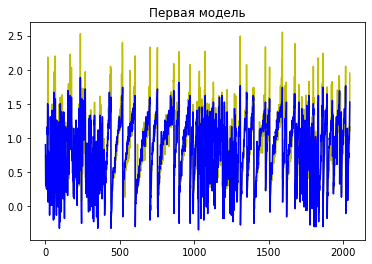

In [27]:
print(np.corrcoef(df_second['Whole_weight'], weight_pred_1)[0][1])
plt.plot(range(len(weight_pred_1)), df_second[['Whole_weight']], 'y')  # исходные
plt.plot(range(len(weight_pred_1)), weight_pred_1, 'b')  # предсказанные
plt.title('Первая модель')
plt.show()

0.8897587958033834


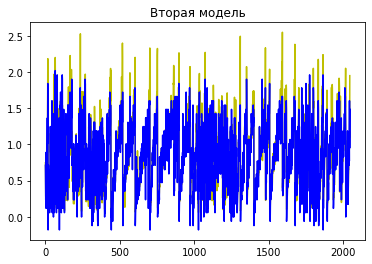

In [28]:
print(np.corrcoef(df_second['Whole_weight'], weight_pred_2)[0][1])
plt.plot(range(len(weight_pred_2)), df_second[['Whole_weight']], 'y')
plt.plot(range(len(weight_pred_2)), weight_pred_2, 'b')
plt.title('Вторая модель')
plt.show()

0.9398801507245295


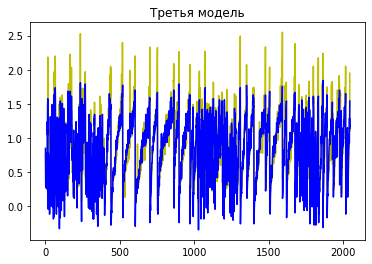

In [29]:
print(np.corrcoef(df_second['Whole_weight'], weight_pred_3)[0][1])
plt.plot(range(len(weight_pred_3)), df_second[['Whole_weight']], 'y')
plt.plot(range(len(weight_pred_3)), weight_pred_3, 'b')
plt.title('Третья модель')
plt.show()

In [30]:
print('Коэффициенты корреляции истинных и предсказанных значений')
for idx, weight_pred_i in enumerate([weight_pred_1, weight_pred_2, weight_pred_3]):
    print('Модель №', idx, ':', np.corrcoef(df_second['Whole_weight'], weight_pred_i)[0][1])

Коэффициенты корреляции истинных и предсказанных значений
Модель № 0 : 0.9311947239751597
Модель № 1 : 0.8897587958033834
Модель № 2 : 0.9398801507245295


# Выводы

Лучше всего предсказывает модель, использующая два признака 